In [1]:
from nsetools import Nse
from nsepy import get_history
nse=Nse()
from datetime import date
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
all_stock_codes = nse.get_stock_codes()
stock_codes=list(all_stock_codes.keys())

In [4]:
#stock_codes=['RAJESHEXPO','NITINSPIN']

In [5]:
stocks={}

In [6]:
from statistics import mean
from statistics import stdev
for sym in stock_codes:
    df = get_history(symbol=sym,
                        start=date(2021,7,21), 
                        end=date(2021,8,1))
    try:
        obj={'Name':df['Symbol'][0],'gain':[(100/df['Close'][i-1])*(df['Close'][i]-df['Close'][i-1]) for i in range(1,len(df['Close']))],'delivery':[i for i in df['%Deliverble']],'close':[df['Close'][i] for i in range(1,len(df['Close']))]}
        obj['mean']=mean(obj['gain'])
        obj['std']=stdev(obj['gain'])
        stocks[obj['Name']]=obj
    except:
        print(sym)

SYMBOL
3IINFOTECH
3PLAND
ADANIGREEN
ADANIPOWER
ADANITRANS
ADL
ADROITINFO
AFFLE
AGCNET
AIRAN
AJMERA
AKSHOPTFBR
ALCHEM
ALPSINDUS
ANANTRAJ
ANDHRACEMT
ANKITMETAL
ANTGRAPHIC
ARCHIDPLY
ARCHIES
ARCOTECH
ARVEE
ASAL
ASHAPURMIN
ATGL
ATLANTA
ATLASCYCLE
ATNINTER
AUSOMENT
AUTOLITIND
AWHCL
BAJAJHIND
BALLARPUR
BANG
BARBEQUE
BARTRONICS
BBTC
BCG
BEDMUTHA
BGLOBAL
BHARATWIRE
BILENERGY
BIRLACABLE
BKMINDST
BLUECHIP
BLUECOAST
BORORENEW
BRFL
BURGERKING
BURNPUR
BUTTERFLY
BVCL
CALSOFT
CANDC
CCCL
CCHHL
CDSL
CEBBCO
CGPOWER
CHEMCON
CHROMATIC
CINEVISTA
CLSEL
COX&KINGS
CREATIVE
CREST
CYBERMEDIA
DALALSTCOM
DAMODARIND
DCMFINSERV
DEEPAKFERT
DEEPENR
DGCONTENT
DHARSUGAR
DIAPOWER
DIGISPICE
DQE
DUCON
EASEMYTRIP
EASUNREYRL
ECLERX
EDUCOMP
EKC
EMCO
EQUITASBNK
EUROMULTI
EXCEL
EXPLEOSOL
FCSSOFT
GAMMNINFRA
GANGOTRI
GAYAHWS
GDL
GENUSPAPER
GILLANDERS
GISOLUTION
GLAND
GLOBE
GLOBUSSPR
GODHA
GOENKA
GPIL
GREENPANEL
GTL
GTLINFRA
GUJRAFFIA
GULPOLY
GVKPIL
HAVISHA
HDIL
HFCL
HGS
HIMATSEIDE
HINDNATGLS
HMT
HNDFDS
HOMEFIRST
HOTELRUGBY
ICDSLT

In [7]:
table=pd.DataFrame()
names=[]
mean=[]
std=[]
for i in list(stocks.keys()):
    names.append(i)
    mean.append(stocks[i]['mean'])
    std.append(stocks[i]['std'])
table['name']=names
table['mean']=mean
table['std']=std

In [8]:
ob1=table.sort_values(by=['std'])

In [9]:
ob1

,name,mean,std
126,AUTOIND,4.945334,0.020026
451,GOODLUCK,4.975516,0.027050
533,HUBTOWN,4.919196,0.047078
144,BALKRISHNA,4.941230,0.083114
971,PRAKASHSTL,3.451013,0.119071
...,...,...,...
977,PREMIERPOL,5.894351,11.248078
1211,SWANENERGY,1.445049,11.451091
641,JOCIL,6.300133,12.005416
1217,TAINWALCHM,5.835294,12.107727


In [10]:
tb=ob1.set_index('name')

In [11]:
tb

,mean,std
name,,
AUTOIND,4.945334,0.020026
GOODLUCK,4.975516,0.027050
HUBTOWN,4.919196,0.047078
BALKRISHNA,4.941230,0.083114
PRAKASHSTL,3.451013,0.119071
...,...,...
PREMIERPOL,5.894351,11.248078
SWANENERGY,1.445049,11.451091
JOCIL,6.300133,12.005416


In [12]:
tb[tb['mean']>0].to_csv('STD.csv')

In [13]:
#stocks['INFY']['delivery']

In [14]:
stock_codes

['SYMBOL',
 '20MICRONS',
 '21STCENMGM',
 '3IINFOTECH',
 '3MINDIA',
 '3PLAND',
 '5PAISA',
 '63MOONS',
 'A2ZINFRA',
 'AAKASH',
 'AARON',
 'AARTIDRUGS',
 'AARTIIND',
 'AARTISURF',
 'AARVEEDEN',
 'AARVI',
 'AAVAS',
 'ABAN',
 'ABB',
 'ABBOTINDIA',
 'ABCAPITAL',
 'ABFRL',
 'ACC',
 'ACCELYA',
 'ACCURACY',
 'ACE',
 'ACRYSIL',
 'ADANIENT',
 'ADANIGREEN',
 'ADANIPORTS',
 'ADANIPOWER',
 'ADANITRANS',
 'ADFFOODS',
 'ADL',
 'ADORWELD',
 'ADROITINFO',
 'ADSL',
 'ADVANIHOTR',
 'ADVENZYMES',
 'AEGISCHEM',
 'AFFLE',
 'AGARIND',
 'AGCNET',
 'AGRITECH',
 'AGROPHOS',
 'AHLADA',
 'AHLEAST',
 'AHLUCONT',
 'AHLWEST',
 'AIAENG',
 'AIRAN',
 'AJANTPHARM',
 'AJMERA',
 'AJOONI',
 'AKASH',
 'AKG',
 'AKSHARCHEM',
 'AKSHOPTFBR',
 'AKZOINDIA',
 'ALANKIT',
 'ALBERTDAVD',
 'ALCHEM',
 'ALEMBICLTD',
 'ALICON',
 'ALKALI',
 'ALKEM',
 'ALKYLAMINE',
 'ALLCARGO',
 'ALLSEC',
 'ALMONDZ',
 'ALOKINDS',
 'ALPA',
 'ALPHAGEO',
 'ALPSINDUS',
 'AMARAJABAT',
 'AMBER',
 'AMBICAAGAR',
 'AMBIKCO',
 'AMBUJACEM',
 'AMDIND',
 'AMJLAND',
 'AM

<h1> Analysis of individual Stocks <h1>

In [15]:
stocks['NITINSPIN'].keys()

dict_keys(['Name', 'gain', 'delivery', 'close', 'mean', 'std'])

In [23]:
factor1='delivery'
factor2='gain'
factor3='close'

In [41]:
name='HINDZINC'

In [42]:
g1=stocks[name][factor1][1:]
g2=stocks[name][factor2]
g3=stocks[name][factor3]

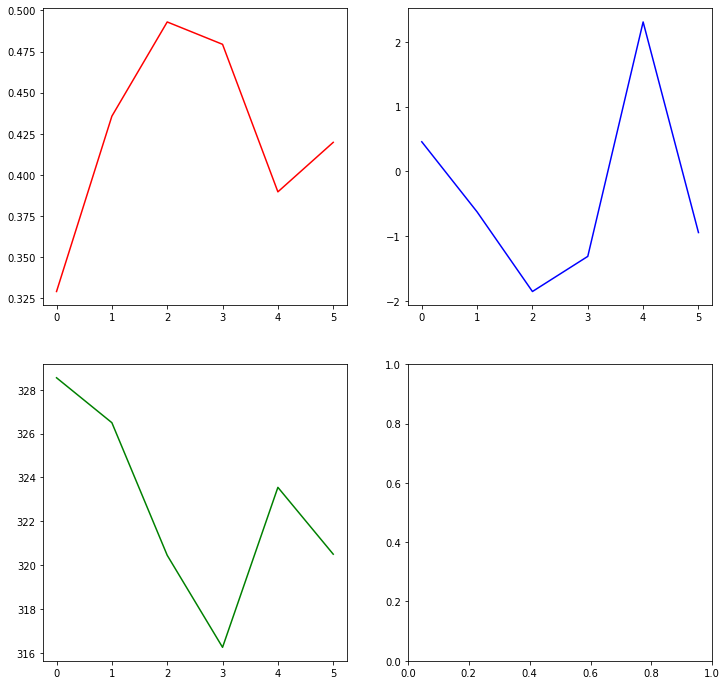

In [43]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.lineplot(ax=ax[0][0],y=g1,x=np.arange(len(g1)),color='red')
sns.lineplot(ax=ax[0][1],y=g2,x=np.arange(len(g2)),color='blue')
sns.lineplot(ax=ax[1][0],y=g3,x=np.arange(len(g3)),color='green')
plt.show()

In [44]:
from statistics import mean
from statistics import stdev
s1=pd.Series(stocks[name]['gain'])
p=s1[s1>0]
n=s1[s1<0]
if(len(n)==0):
    n=[0]
if(len(p)==0):
    p=[0]
avg=mean(s1)
pos_mean=mean(p)
pos_max=max(p)
neg_mean=mean(n)
neg_min=min(n)
gain_days_prob=len(p)/len(s1)
loss_days_prob=len(n)/len(s1)

In [45]:
tb=pd.DataFrame(index=[name])
tb['max_pos']=pos_max
tb['mean_pos']=pos_mean
tb['min_neg']=neg_min
tb['mean_neg']=neg_mean
tb['mean']=avg
tb['gain_days_prob']=gain_days_prob
tb['loss_days_prob']=loss_days_prob

In [46]:
tb

,max_pos,mean_pos,min_neg,mean_neg,mean,gain_days_prob,loss_days_prob
HINDZINC,2.3083,1.383473,-1.852986,-1.182566,-0.32722,0.333333,0.666667
